# Importing Libraries

In [1]:
#!pip install scikit-learn

In [2]:
#Suppressing the warnings
import warnings
from IPython import get_ipython

warnings.filterwarnings('ignore', category=DeprecationWarning, module='ipykernel')
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
from sklearn.cluster import _kmeans
from IPython.core import getipython

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=_kmeans.ConvergenceWarning)
getipython.get_ipython().configurables[-1].preprocess_options = ['single']


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import csv
# import warnings
# warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as ticker

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
%matplotlib inline

# Reading and Cleaning the Data

In [5]:
#reading the dataframe
mhs = pd.read_csv('mhs.csv')
mhs

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [6]:
mhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
mhs.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [8]:
mhs.duplicated().sum()

562

In [9]:
mhs = mhs.drop_duplicates()
mhs 

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


In [10]:
# Women above 50

above_50 = mhs.loc[(mhs['Age'] >= 50) & (mhs['RiskLevel'] != 'high risk')]

print(len(above_50))

40


In [11]:
above_50_SBP = above_50.loc[(above_50['SystolicBP'] >= 140)]
above_50_SBP

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
21,50,140,80,6.7,98.0,70,mid risk


In [12]:
# Underaged pregnancy

underaged_preg = mhs.loc[(mhs['Age'] < 18)]
underaged_preg

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
15,15,120,80,7.01,98.0,70,low risk
19,10,70,50,6.90,98.0,70,low risk
25,16,100,70,7.20,98.0,80,low risk
35,12,95,60,6.10,102.0,60,low risk
48,15,76,49,7.50,98.0,77,low risk
...,...,...,...,...,...,...,...
672,15,100,49,6.00,99.0,77,low risk
673,12,100,50,6.40,98.0,70,mid risk
674,15,100,60,6.00,98.0,80,low risk
703,15,100,49,7.60,98.0,77,low risk


In [13]:
print(len(underaged_preg))

96


In [14]:
# Noticed aged 10 pregnancies

age_10_preg = mhs.loc[(mhs['Age'] <= 10)]
age_10_preg

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
19,10,70,50,6.9,98.0,70,low risk
250,10,85,65,6.9,98.0,70,low risk
670,10,100,50,6.0,99.0,70,mid risk


In [15]:
print(len(age_10_preg))

3


In [16]:
# mhs = mhs[mhs['Age'] != 10]
# mhs

# Visualization

## Pandas Profiling

In [17]:
#!pip install pandas-profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(mhs)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Plotting the distribution plots and correlations

<Figure size 1200x800 with 0 Axes>

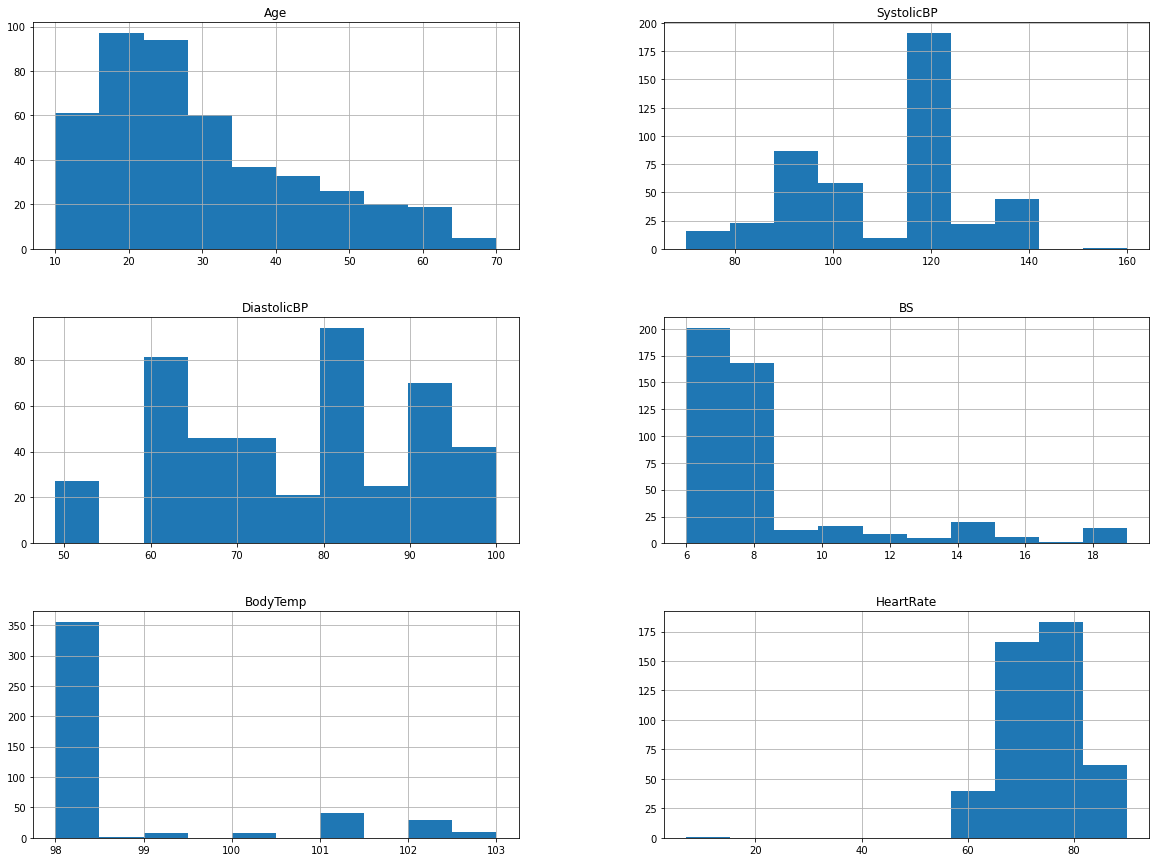

In [18]:
plt.figure(dpi=200)
mhs.hist(figsize = (20,15))
plt.show()

In [19]:
mhs.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000


### Heat Map

<AxesSubplot:>

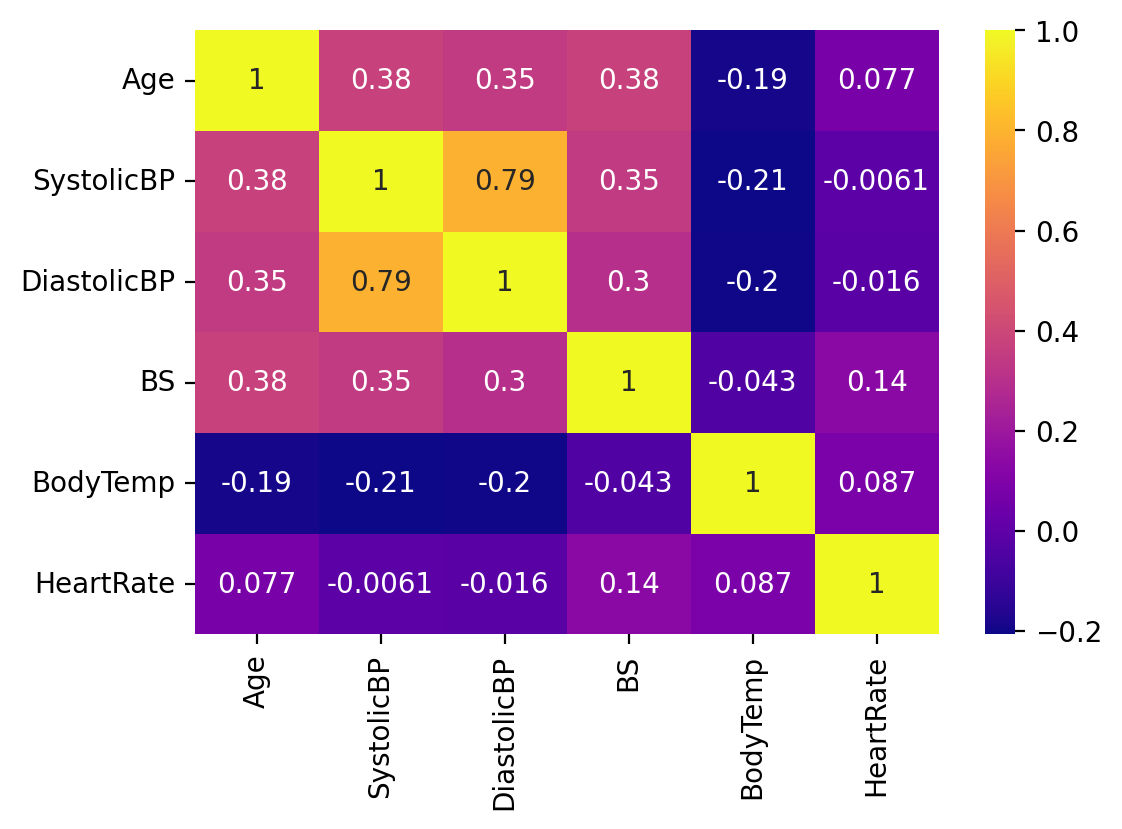

In [20]:
# checking for correlation to see if any of the variables have strong relationship
plt.figure(dpi=200)
sns.heatmap(mhs.corr(), annot = True, cmap = 'plasma')

# Building and fitting a linear model

### Import useful libraries

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression # importing the model
from sklearn.linear_model import LogisticRegression #importing the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import (accuracy_score, classification_report,
confusion_matrix, ConfusionMatrixDisplay,
roc_curve,roc_auc_score)

### Splitting the data to train and validate

In [22]:
x = mhs[['Age', 'DiastolicBP', 'BS']]
y = mhs['SystolicBP']
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3,random_state=0)

### Scaling the dataset

In [23]:
data_scaler = MinMaxScaler()
x_train_mhs = data_scaler.fit_transform(x_train)
#x_test_mhs = data_scaler.transform(X_test)
x_val_mhs = data_scaler.fit_transform(x_val)

### Multivariate Linear Regression model

In [24]:
model = LinearRegression()

model.fit(x_train_mhs, y_train)

LinearRegression()

In [25]:
# preds = model.predict(x_train_mhs)
preds = model.predict(x_train_mhs)

In [26]:
mae = mean_absolute_error(preds, y_train)
mse = mean_squared_error(preds, y_train)

# Additional metrics
rmse = np.sqrt(mse)
r2 = r2_score(y_train, preds)

In [27]:
test_preds = model.predict(x_val_mhs)

test_mae = mean_absolute_error(test_preds, y_val)
test_mse = mean_squared_error(test_preds, y_val)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_val, test_preds)


In [28]:
# Create a dictionary with metrics and their values
metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Training': [mae, mse, rmse, r2],
    'Test': [test_mae, test_mse, test_rmse, test_r2]
}

# Convert the dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics_data)


# Set the index to the 'Metric' column and round the numbers
metrics_df.set_index('Metric', inplace=True)
metrics_df = metrics_df.round(2)

# Display the formatted table
metrics_df


,Training,Test
Metric,,
MAE,8.07,9.48
MSE,104.68,137.56
RMSE,10.23,11.73
R2,0.69,0.48


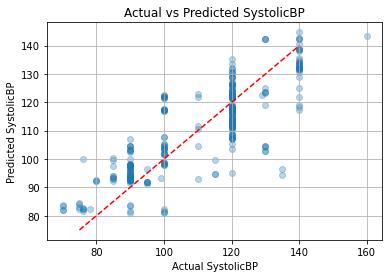

In [29]:
# Plotting the result of our model
plt.scatter(y_train, preds, alpha=0.3)
plt.xlabel('Actual SystolicBP')
plt.ylabel('Predicted SystolicBP')
plt.title('Actual vs Predicted SystolicBP')
plt.grid(True)

# Add the identity line (y=x) for reference
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')

plt.show()


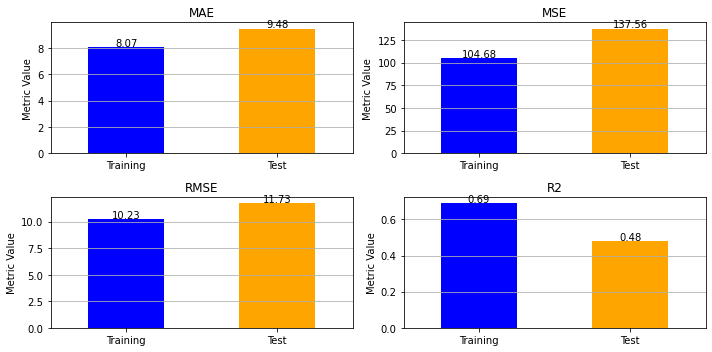

In [30]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate through metrics and axes, creating a bar plot for each metric
for i, (metric, ax) in enumerate(zip(metrics_df.index, axs)):
    metrics_df.loc[metric].plot(kind='bar', ax=ax, color=['blue', 'orange'])

    # Customize the plot
    ax.set_title(metric)
    ax.set_ylabel('Metric Value')
    ax.set_xticklabels(['Training', 'Test'], rotation=0)
    ax.grid(axis='y')

    # Add value labels on top of the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height() * 1.01),
                    ha='center', fontsize=10)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


# Applying the PCA

## Converting categoricals to numericals

In [31]:
from sklearn.preprocessing import LabelEncoder

# Label encoding
le = LabelEncoder()
df_label_encoded = mhs.copy()
df_label_encoded['RiskLevel'] = le.fit_transform(mhs['RiskLevel'])

df_label_encoded


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2
674,15,100,60,6.0,98.0,80,1
703,15,100,49,7.6,98.0,77,1
704,12,100,50,6.0,98.0,70,2


In [32]:
df_label_encoded.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

<AxesSubplot:>

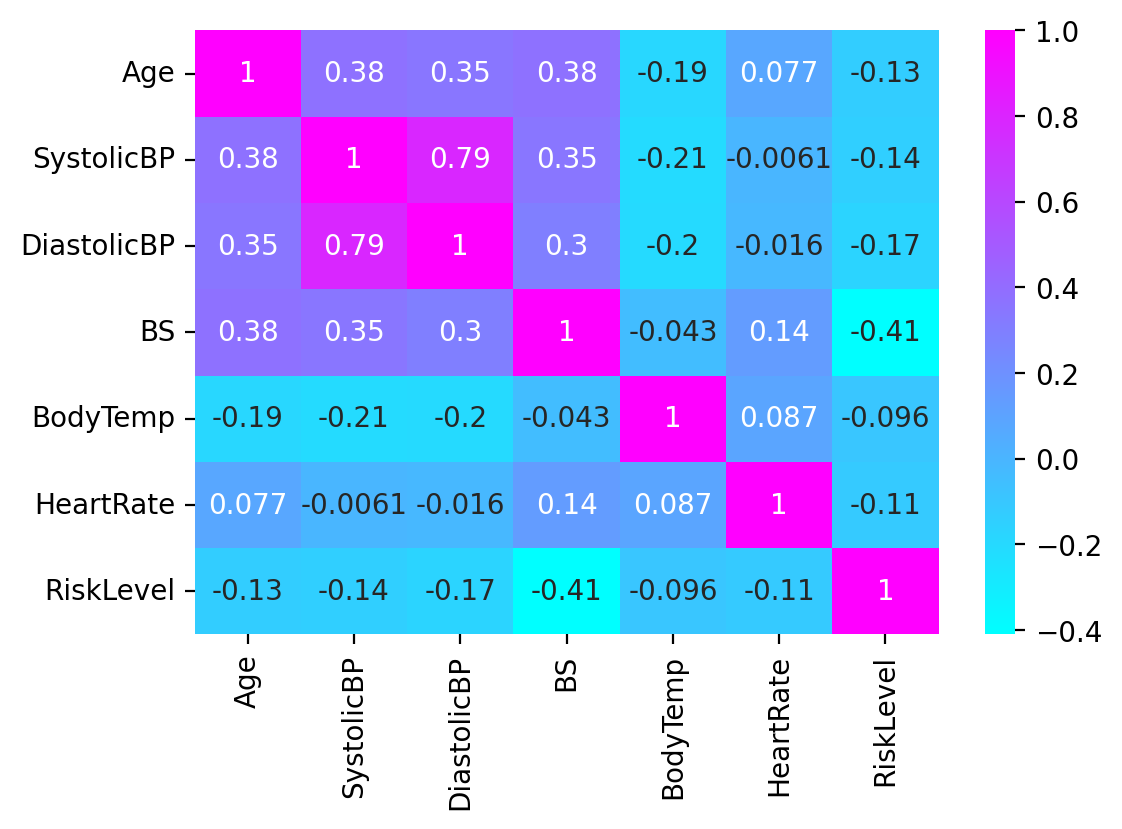

In [33]:
# checking for correlation to see if any of the variables have strong relationship
plt.figure(dpi=200)
sns.heatmap(df_label_encoded.corr(), annot = True, cmap = 'cool')

### Standardization

In [34]:
# Separate features and target variable

X = df_label_encoded.drop('SystolicBP', axis=1)  # Replace 'target_column' with the name of your target column
y = df_label_encoded['SystolicBP']

#Standardize the feature matrix (important for PCA)

scaler = StandardScaler()
train_scaled = scaler.fit_transform(X)
# val_scaled = scaler.fit_tranform(x_val)

#Initialize PCA with the desired number of components
n_components = 6
pca = PCA(n_components=n_components)

#Fit PCA and transform the data
train_pca = pca.fit_transform(train_scaled)
# val_pca = pca.fit_transform(val_scaled)

### The PCA

In [35]:
#Create a new Dataframe with the PCA-transformed data
columns = [f'PC{i + 1}' for i in range(n_components)]
pca_df = pd.DataFrame(train_pca, columns=columns)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,2.188385,-1.420644,-0.435867,-1.374446,0.088752,1.140949
1,2.217361,-0.013125,1.052394,-0.593789,0.071273,0.360691
2,0.256161,-1.671234,0.140486,-0.219143,0.070242,-0.819186
3,0.679032,0.220749,0.842437,-0.713467,0.610462,-1.054170
4,-0.647123,0.130529,-0.640918,-0.404213,-0.820751,-0.831121
...,...,...,...,...,...,...
447,-2.459193,0.530731,-0.313378,-0.632190,-0.863968,0.701748
448,-1.326664,-0.391711,-0.759102,-1.128626,0.013800,-0.208569
449,-1.443496,-0.563880,-0.463093,-1.349345,-0.864468,0.173666
450,-2.538083,0.558383,-0.329940,-0.622273,-0.821015,0.597693


### Explained Variance Ratio

In [36]:
# pca.explained_variance_ratio_

# Create a dictionary with the component names and their explained variance ratios
explained_variance_data = {
    'Component': [f'PC{i + 1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)
}

# Convert the dictionary to a pandas DataFrame
explained_variance_df = pd.DataFrame(explained_variance_data)

# Display the DataFrame
explained_variance_df

,Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.323163,0.323163
1,PC2,0.210743,0.533906
2,PC3,0.153404,0.687310
3,PC4,0.119360,0.806670
4,PC5,0.109165,0.915835
5,PC6,0.084165,1.000000


### Transformation Matrix

In [37]:
# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(pca.components_, columns=X.columns)

# Add a column with the component names
loadings_df['Component'] = [f'PC{i + 1}' for i in range(len(pca.components_))]

# Rearrange the columns to have 'Component' as the first column
loadings_df = loadings_df[['Component'] + list(X.columns)]

loadings_df


,Component,Age,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,PC1,0.502954,0.472963,0.557371,-0.173526,0.145921,-0.401594
1,PC2,0.207854,0.289418,-0.195362,-0.651534,-0.462126,0.443633
2,PC3,-0.204880,0.098975,0.117013,0.267640,-0.839245,-0.398213
3,PC4,0.466431,0.271621,-0.070066,0.684201,-0.098899,0.475229
4,PC5,-0.490400,0.778766,-0.303472,0.074122,0.225320,-0.068355
5,PC6,-0.451451,0.049933,0.735170,0.011629,-0.016272,0.502816


### Select the best PCAs

In [38]:
# Select the first four principal components
selected_pcs = pca_df.iloc[:, :4]

# Display the DataFrame with the selected PCs
selected_pcs


,PC1,PC2,PC3,PC4
0,2.188385,-1.420644,-0.435867,-1.374446
1,2.217361,-0.013125,1.052394,-0.593789
2,0.256161,-1.671234,0.140486,-0.219143
3,0.679032,0.220749,0.842437,-0.713467
4,-0.647123,0.130529,-0.640918,-0.404213
...,...,...,...,...
447,-2.459193,0.530731,-0.313378,-0.632190
448,-1.326664,-0.391711,-0.759102,-1.128626
449,-1.443496,-0.563880,-0.463093,-1.349345
450,-2.538083,0.558383,-0.329940,-0.622273


# Refitting the linear model with the PCA

In [39]:
# Split the selected_pcs DataFrame into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(selected_pcs, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the training set
preds_pca = model_pca.predict(X_train_pca)

# Make predictions on the test set
preds_pca_test = model_pca.predict(X_test_pca)

In [40]:
# Calculate the mean absolute error (MAE) and mean squared error (MSE) on the training set
mae_pca = mean_absolute_error(preds_pca, y_train_pca)
mse_pca = mean_squared_error(preds_pca, y_train_pca)

# Additional metrics
rmse_pca = np.sqrt(mse)
r2_pca = r2_score(y_train, preds)

pca_test_mae = mean_absolute_error(preds_pca_test, y_test_pca)
pca_test_mse = mean_squared_error(preds_pca_test, y_test_pca)
pca_test_rmse = np.sqrt(pca_test_mse)
pca_test_r2 = r2_score(y_test_pca, preds_pca_test)

In [41]:
# Create a dictionary with metrics and their values
pca_metrics_data = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Training': [mae_pca, mse_pca, rmse_pca, r2_pca],
    'Test': [pca_test_mae, pca_test_mse, pca_test_rmse, pca_test_r2]
}

# Convert the dictionary to a pandas DataFrame
pca_metrics_df = pd.DataFrame(pca_metrics_data)


# Set the index to the 'Metric' column and round the numbers
pca_metrics_df.set_index('Metric', inplace=True)
pca_metrics_df = pca_metrics_df.round(2)

# Display the formatted table
pca_metrics_df


,Training,Test
Metric,,
MAE,10.77,9.68
MSE,170.69,137.09
RMSE,10.23,11.71
R2,0.69,0.54


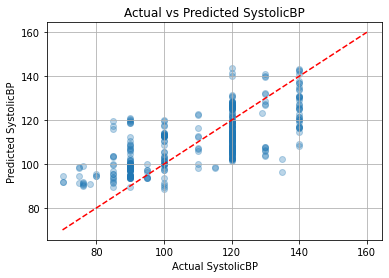

In [42]:
# Plotting the result of our model
plt.scatter(y_train_pca, preds_pca, alpha=0.3)
plt.xlabel('Actual SystolicBP')
plt.ylabel('Predicted SystolicBP')
plt.title('Actual vs Predicted SystolicBP')
plt.grid(True)

# Add the identity line (y=x) for reference
plt.plot([min(y_test_pca), max(y_test_pca)], [min(y_test_pca), max(y_test_pca)], color='red', linestyle='--')

plt.show()


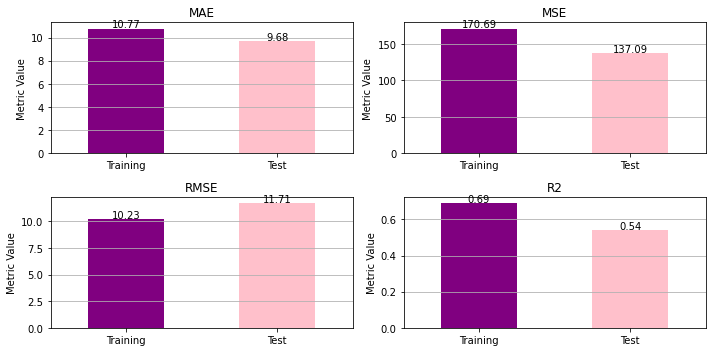

In [43]:
# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Iterate through metrics and axes, creating a bar plot for each metric
for i, (metric, ax) in enumerate(zip(metrics_df.index, axs)):
    pca_metrics_df.loc[metric].plot(kind='bar', ax=ax, color=['purple', 'pink'])

    # Customize the plot
    ax.set_title(metric)
    ax.set_ylabel('Metric Value')
    ax.set_xticklabels(['Training', 'Test'], rotation=0)
    ax.grid(axis='y')

    # Add value labels on top of the bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height() * 1.01),
                    ha='center', fontsize=10)

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()


# Investigating the relationship between Age and Heartrate

In [44]:
# Use .loc to filter rows where 'Age' is greater than 70
people_above_70 = mhs.loc[mhs['Age'] >= 70]

# Display the filtered DataFrame
people_above_70


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
338,70,85,60,6.9,102.0,70,low risk


In [45]:
# Define age bins
age_bins = [10, 20, 30, 40, 50, 60, np.inf]

# Define custom age group labels
age_labels = ['10-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Group the data by age bins with custom labels
mhs['AgeGroup'] = pd.cut(mhs['Age'], bins=age_bins, labels=age_labels)
mhs

<ipython-input-45-eeba5ac2a34d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhs['AgeGroup'] = pd.cut(mhs['Age'], bins=age_bins, labels=age_labels)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeGroup
0,25,130,80,15.0,98.0,86,high risk,21-30
1,35,140,90,13.0,98.0,70,high risk,31-40
2,29,90,70,8.0,100.0,80,high risk,21-30
3,30,140,85,7.0,98.0,70,high risk,21-30
4,35,120,60,6.1,98.0,76,low risk,31-40
...,...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk,10-20
674,15,100,60,6.0,98.0,80,low risk,10-20
703,15,100,49,7.6,98.0,77,low risk,10-20
704,12,100,50,6.0,98.0,70,mid risk,10-20


In [46]:
# Calculate the mean heart rate for each age group
mean_heart_rate_by_age = mhs.groupby('AgeGroup')['HeartRate'].mean()
mean_heart_rate_by_age

AgeGroup
10-20    72.902256
21-30    74.846154
31-40    73.260870
41-50    74.956522
51-60    73.578947
61-70    77.714286
Name: HeartRate, dtype: float64

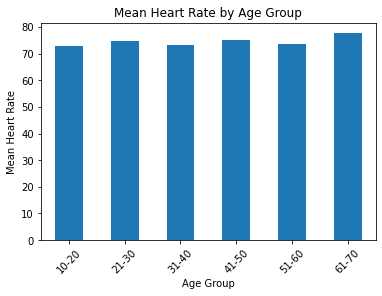

In [47]:
# Plot the mean heart rate for each age group
mean_heart_rate_by_age.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

# Investigating associations between pairs of diastolic and systolic blood pressure

In [48]:
'''Create a new column to categorize the systolic and diastolic 
blood pressure (SBP and DBP) into high, normal, and low categories.'''

def categorize_blood_pressure(df):
    def categorize(value, normal_limits):
        if value < normal_limits[0]:
            return 'low'
        elif value <= normal_limits[1]:
            return 'normal'
        else:
            return 'high'

    sbp_normal_limits = (110, 139)
    dbp_normal_limits = (70, 89)

    df['SBP_category'] = df['SystolicBP'].apply(lambda x: categorize(x, sbp_normal_limits))
    df['DBP_category'] = df['DiastolicBP'].apply(lambda x: categorize(x, dbp_normal_limits))

    return df

mhs_categorized = categorize_blood_pressure(mhs)
mhs_categorized

<ipython-input-48-f50d76f18e29>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SBP_category'] = df['SystolicBP'].apply(lambda x: categorize(x, sbp_normal_limits))
<ipython-input-48-f50d76f18e29>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DBP_category'] = df['DiastolicBP'].apply(lambda x: categorize(x, dbp_normal_limits))


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeGroup,SBP_category,DBP_category
0,25,130,80,15.0,98.0,86,high risk,21-30,normal,normal
1,35,140,90,13.0,98.0,70,high risk,31-40,high,high
2,29,90,70,8.0,100.0,80,high risk,21-30,low,normal
3,30,140,85,7.0,98.0,70,high risk,21-30,high,normal
4,35,120,60,6.1,98.0,76,low risk,31-40,normal,low
...,...,...,...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk,10-20,low,low
674,15,100,60,6.0,98.0,80,low risk,10-20,low,low
703,15,100,49,7.6,98.0,77,low risk,10-20,low,low
704,12,100,50,6.0,98.0,70,mid risk,10-20,low,low


In [49]:
#Blood Pressure Categories

def categorize_blood_pressure(df):
    def categorize(systolic, diastolic):
        if systolic >= 140 or diastolic >= 90:
            return 'high'
        elif 110 <= systolic <= 139 and 70 <= diastolic <= 89:
            return 'normal'
        elif systolic < 110 and diastolic < 70:
            return 'low'
        else:
            return 'mixed'

    df['BP_category'] = df.apply(lambda row: categorize(row['SystolicBP'], row['DiastolicBP']), axis=1)

    return df

mhs_categorized = categorize_blood_pressure(mhs)
mhs_categorized

<ipython-input-49-d62a6c706748>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BP_category'] = df.apply(lambda row: categorize(row['SystolicBP'], row['DiastolicBP']), axis=1)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeGroup,SBP_category,DBP_category,BP_category
0,25,130,80,15.0,98.0,86,high risk,21-30,normal,normal,normal
1,35,140,90,13.0,98.0,70,high risk,31-40,high,high,high
2,29,90,70,8.0,100.0,80,high risk,21-30,low,normal,mixed
3,30,140,85,7.0,98.0,70,high risk,21-30,high,normal,high
4,35,120,60,6.1,98.0,76,low risk,31-40,normal,low,mixed
...,...,...,...,...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk,10-20,low,low,low
674,15,100,60,6.0,98.0,80,low risk,10-20,low,low,low
703,15,100,49,7.6,98.0,77,low risk,10-20,low,low,low
704,12,100,50,6.0,98.0,70,mid risk,10-20,low,low,low


In [50]:
mhs_categorized = mhs_categorized.drop_duplicates()
mhs_categorized

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,AgeGroup,SBP_category,DBP_category,BP_category
0,25,130,80,15.0,98.0,86,high risk,21-30,normal,normal,normal
1,35,140,90,13.0,98.0,70,high risk,31-40,high,high,high
2,29,90,70,8.0,100.0,80,high risk,21-30,low,normal,mixed
3,30,140,85,7.0,98.0,70,high risk,21-30,high,normal,high
4,35,120,60,6.1,98.0,76,low risk,31-40,normal,low,mixed
...,...,...,...,...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk,10-20,low,low,low
674,15,100,60,6.0,98.0,80,low risk,10-20,low,low,low
703,15,100,49,7.6,98.0,77,low risk,10-20,low,low,low
704,12,100,50,6.0,98.0,70,mid risk,10-20,low,low,low


In [51]:
'''Use the Apriori algorithm to generate frequent itemsets from the
categorized blood pressure data.'''

!pip install mlxtend

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the data
bp_data = mhs_categorized[['SBP_category', 'DBP_category']].values.tolist()

# Apply the transaction encoder
te = TransactionEncoder()
te_data = te.fit(bp_data).transform(bp_data)

# Create a DataFrame from the encoded data
bp_encoded_df = pd.DataFrame(te_data, columns=te.columns_)

# Apply the Apriori algorithm
min_support = 0.0001
frequent_itemsets = apriori(bp_encoded_df, min_support=min_support, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=-1)

# Print the rules
rules


Defaulting to user installation because normal site-packages is not writeable


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(low),(high),0.438053,0.261062,0.015487,0.035354,0.135422,-0.098872,0.766020,-0.919101
1,(high),(low),0.261062,0.438053,0.015487,0.059322,0.135422,-0.098872,0.597385,-0.896264
2,(high),(normal),0.261062,0.592920,0.163717,0.627119,1.057678,0.008928,1.091714,0.073798
3,(normal),(high),0.592920,0.261062,0.163717,0.276119,1.057678,0.008928,1.020801,0.133960
4,(low),(normal),0.438053,0.592920,0.112832,0.257576,0.434419,-0.146899,0.548311,-0.698506
5,(normal),(low),0.592920,0.438053,0.112832,0.190299,0.434419,-0.146899,0.694017,-0.761803


##### The apriori function did not produce the specific association pairs needed, therefore the associations pairs will be generated by manual calculation

In [52]:
def calc_metrics(sbp_cat, dbp_cat):
    
    count_pair = len(mhs_categorized[(mhs_categorized['SBP_category'] == sbp_cat) 
                    & (mhs_categorized['DBP_category'] == dbp_cat)])
    
    support = count_pair / total_records
    confidence = count_pair / len(mhs_categorized[mhs_categorized['SBP_category'] == sbp_cat])
    lift = confidence / (len(mhs_categorized[mhs_categorized['DBP_category'] == dbp_cat]) / total_records)
    conviction = (1 - (len(mhs_categorized[mhs_categorized['DBP_category'] == dbp_cat]) / total_records)) / (1 - confidence)
    
    return support, confidence, conviction, lift

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
total_records = len(mhs_categorized)

results = {
        'High/High': calc_metrics('high', 'high'),
        'Normal/Normal': calc_metrics('normal', 'normal'),
        'Low/Low': calc_metrics('low', 'low')
    }

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Set the row indices to metric names
results_df.index = ['Support', 'Confidence', 'Conviction', 'Lift']

# Transpose the DataFrame
# results_df = results_df.transpose()

# Display the DataFrame
results_df

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,High/High,Normal/Normal,Low/Low
Support,0.081858,0.316372,0.309735
Confidence,0.860465,0.635556,0.760870
Conviction,5.390855,1.614774,2.757039
Lift,3.472591,1.544468,2.233202


## Plotting the association of the Blood Pressure pairs

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


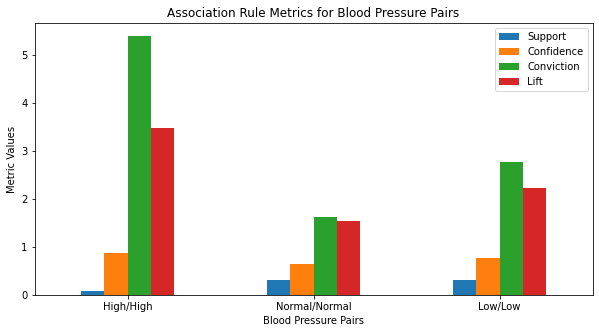

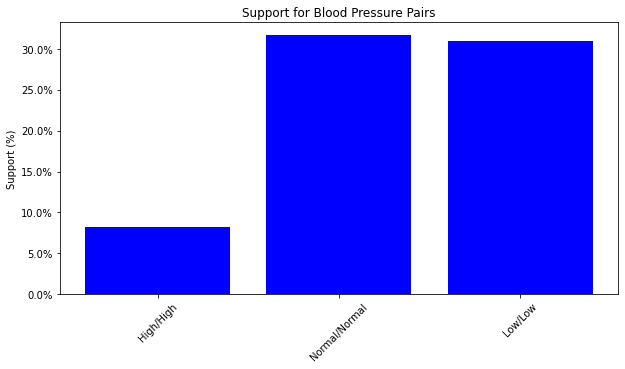

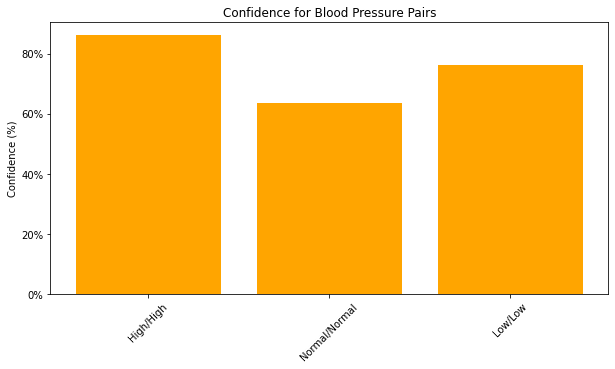

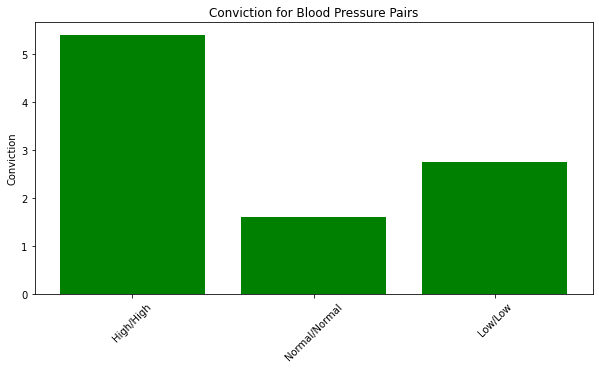

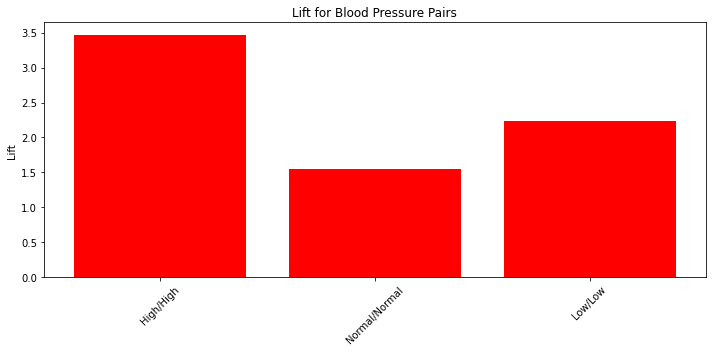

In [54]:
# Transpose the results_df DataFrame for easier plotting
results_df_transposed = results_df.T

# Create a bar plot
ax = results_df_transposed.plot(kind='bar', figsize=(10, 5), rot=0)

# Set labels and title
ax.set_xlabel('Blood Pressure Pairs')
ax.set_ylabel('Metric Values')
ax.set_title('Association Rule Metrics for Blood Pressure Pairs')

# Add a legend
ax.legend(['Support', 'Confidence', 'Conviction', 'Lift'])


# Create separate bar plots for each metric

# Define the metric names and plot titles
metrics = ['Support', 'Confidence', 'Conviction', 'Lift']
plot_titles = [
    'Support for Blood Pressure Pairs',
    'Confidence for Blood Pressure Pairs',
    'Conviction for Blood Pressure Pairs',
    'Lift for Blood Pressure Pairs'
]

# Specify the colors you want to use for each metric
colors = {'Support': 'blue', 'Confidence': 'orange', 'Conviction': 'green', 'Lift': 'red'}


# Plot the bar charts
for i, (metric, color) in enumerate(colors.items()):
    #ax = axes_flat[i]
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.bar(results_df.columns, results_df.loc[metric], color=color)
    ax.set_title(metric)
    ax.set_xticklabels(results_df.columns, rotation=45)
    
    if metric == 'Support' or metric == 'Confidence':
        ax.set_ylabel(f'{metric} (%)')
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(1))
    else:
        ax.set_ylabel(metric)
    ax.set_title(plot_titles[i])
    
# Show the plot
plt.tight_layout()
plt.show()

# Finding clusters of patients with similar SystolicBP

In [55]:
# Prepare the data
systolic_bp = mhs_categorized[['SystolicBP']].values

# Normalize the Systolic BP values
scaler = StandardScaler()
scaled_systolic_bp = scaler.fit_transform(systolic_bp)


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


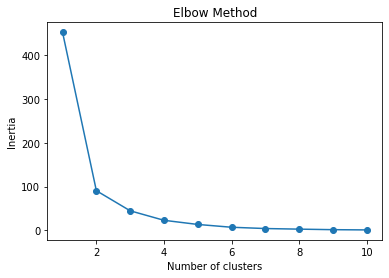

In [56]:
inertia = []

# Test the K-means algorithm for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_systolic_bp)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [57]:
# Set the optimal number of clusters based on the Elbow Method graph
optimal_clusters = 2

# Apply the K-means algorithm
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_systolic_bp)


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Add the clusters as a new column in the original DataFrame
mhs_categorized['Systolic_BP_Cluster'] = clusters


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Analyze the clustering results

In [59]:
# Print the number of patients in each cluster
print(mhs_categorized['Systolic_BP_Cluster'].value_counts())

1    268
0    184
Name: Systolic_BP_Cluster, dtype: int64


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
# Display the patients with their Systolic BP and the corresponding cluster
mhs_categorized[['SystolicBP', 'Systolic_BP_Cluster']]

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,SystolicBP,Systolic_BP_Cluster
0,130,1
1,140,1
2,90,0
3,140,1
4,120,1
...,...,...
673,100,0
674,100,0
703,100,0
704,100,0


## Plotting the clusters

C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


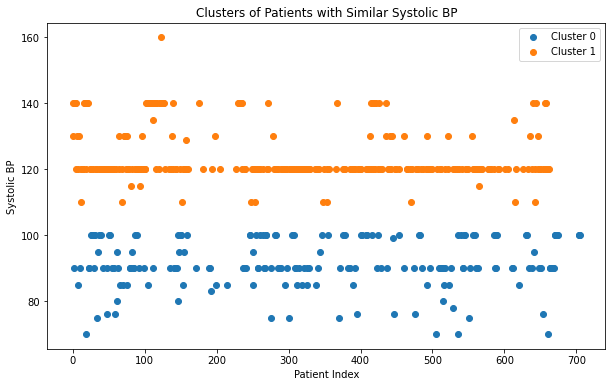

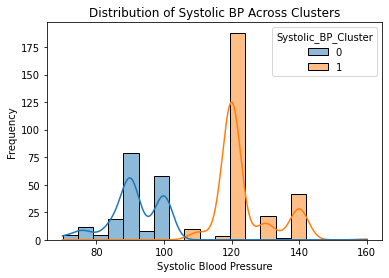

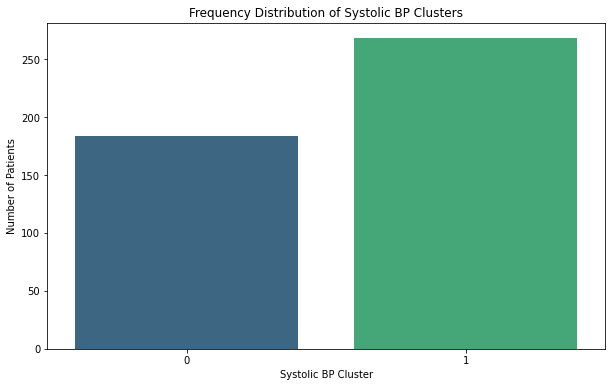

In [61]:
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot of Systolic BP values against their index
for cluster in range(optimal_clusters):
    ax.scatter(
        mhs_categorized[mhs_categorized['Systolic_BP_Cluster'] == cluster].index,
        mhs_categorized[mhs_categorized['Systolic_BP_Cluster'] == cluster]['SystolicBP'],
        label=f"Cluster {cluster}",
    )

# Set labels and title
ax.set_xlabel('Patient Index')
ax.set_ylabel('Systolic BP')
ax.set_title('Clusters of Patients with Similar Systolic BP')

# Add a legend
ax.legend()

# Show the plot
plt.show()

# Add the Systolic_BP_Cluster as a categorical column in the dataframe
mhs_categorized['Systolic_BP_Cluster'] = mhs_categorized['Systolic_BP_Cluster'].astype('category')

# Create a histogram of the Systolic BP values with different colors for each cluster
sns.histplot(data=mhs_categorized, x='SystolicBP', hue='Systolic_BP_Cluster', bins=20, kde=True)

# Set the title and labels
plt.title('Distribution of Systolic BP Across Clusters')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Calculate the frequency of each cluster
cluster_counts = mhs_categorized['Systolic_BP_Cluster'].value_counts()

# Create a bar chart of the cluster frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

# Set the title and labels
plt.title('Frequency Distribution of Systolic BP Clusters')
plt.xlabel('Systolic BP Cluster')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()


# Correlation between age and SystolicBP

In [63]:
correlation = mhs_categorized['Age'].corr(mhs_categorized['SystolicBP'])
print("Correlation between Age and Systolic BP:", correlation)
print('')
print("Percentage Correlation between Age and Systolic BP: {:.2f}%".format(correlation * 100))


Correlation between Age and Systolic BP: 0.37593145079729723

Percentage Correlation between Age and Systolic BP: 37.59%


C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
